1. Implement the following initial value problem (IVP) solvers:

(a) The forward Euler method

(b) The mid-point method

(c) The Heun method

(d) The RK-4 method



In [8]:
import numpy as np

# Forward Euler Method
def forward_euler(f, y0, t):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0, len(t)-1):
        y[n+1] = y[n] + f(y[n], t[n])*(t[n+1] - t[n])
    return y

# Mid-point Method
def mid_point(f, y0, t):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0, len(t)-1):
        h = t[n+1] - t[n]
        k1 = h * f(y[n], t[n])
        k2 = h * f(y[n] + 0.5 * k1, t[n] + 0.5 * h)
        y[n+1] = y[n] + k2
    return y

# Heun's Method
def heun(f, y0, t):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0, len(t)-1):
        h = t[n+1] - t[n]
        k1 = h * f(y[n], t[n])
        k2 = h * f(y[n] + k1, t[n] + h)
        y[n+1] = y[n] + 0.5 * (k1 + k2)
    return y

# RK-4 Method
def rk4(f, y0, t):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0, len(t)-1):
        h = t[n+1] - t[n]
        k1 = h * f(y[n], t[n])
        k2 = h * f(y[n] + 0.5 * k1, t[n] + 0.5 * h)
        k3 = h * f(y[n] + 0.5 * k2, t[n] + 0.5 * h)
        k4 = h * f(y[n] + k3, t[n] + h)
        y[n+1] = y[n] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return y


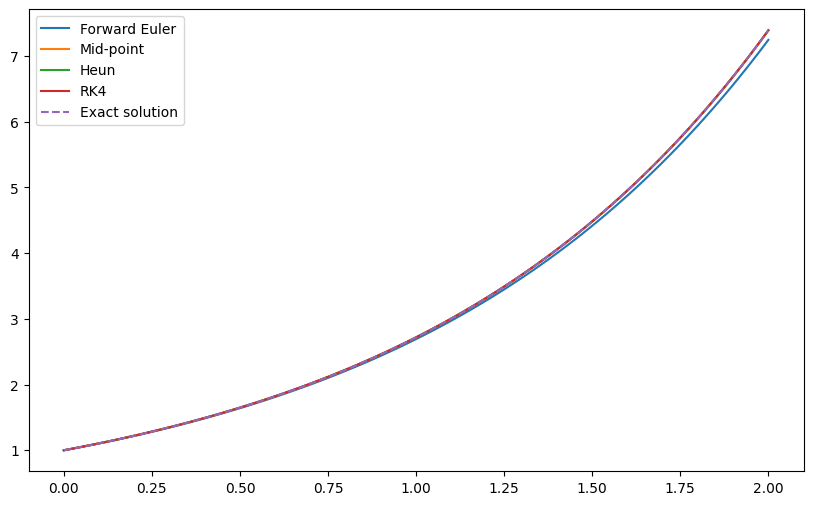

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(y, t):
    return y

# Initial condition
y0 = 1

# Time points
t = np.linspace(0, 2, 100)

# Solve the equation
y_fe = forward_euler(f, y0, t)
y_mp = mid_point(f, y0, t)
y_heun = heun(f, y0, t)
y_rk4 = rk4(f, y0, t)

# Plot the solutions
plt.figure(figsize=(10, 6))
plt.plot(t, y_fe, label='Forward Euler')
plt.plot(t, y_mp, label='Mid-point')
plt.plot(t, y_heun, label='Heun')
plt.plot(t, y_rk4, label='RK4')
plt.plot(t, np.exp(t), label='Exact solution', linestyle='dashed')
plt.legend()
plt.show()


2. Using the above solvers, solve the following IVPs. Play with discretization parameter to get
reliable numerical solution. Plot the solution for different values of the discretization parameter
and for different numerical method. In all cases, interpret your result.
(a)
dP/dt = rP (1-P/k), P(0) = 90. Take r = 5, K = 80. Find the solution for t ∈ [0, 200].

(b)
my′′ + cy′ + ky = 0, y(0) = 0, y′(0) = 2. Take m = 10, k = 90, c = 10. Take appropriate time interval.

(c)
x¨ + µ(x2 - 1) ˙x + x = 0. x(0) = 0, x˙(0) = 2. Take µ = 0, 2, -2. Take appropriate time interval.

<ipython-input-10-20c0a566afec>:9: RuntimeWarning: overflow encountered in scalar multiply
  return r * P * (1 - P / K)


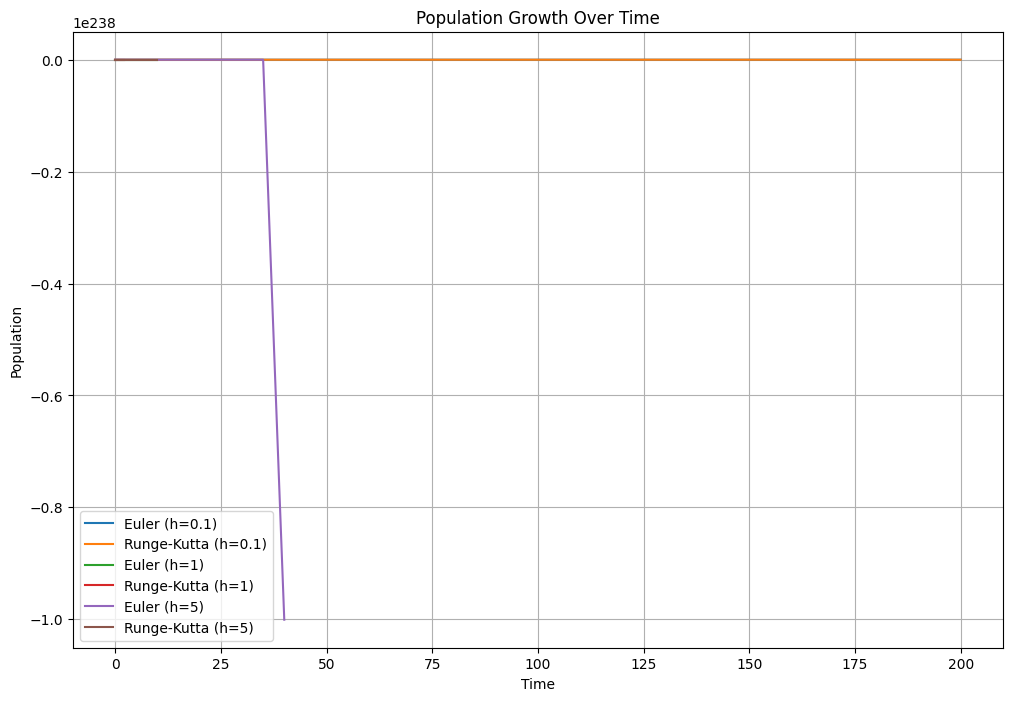

In [10]:
#A
import numpy as np
import matplotlib.pyplot as plt

# Define the differential equation and parameters
r = 5
K = 80

def f(t, P):
    return r * P * (1 - P / K)

# Euler's Method Solver
def euler_solver(h, t_max, P0):
    num_steps = int(t_max / h)
    t_values = np.linspace(0, t_max, num_steps + 1)
    P_values = np.zeros(num_steps + 1)
    P_values[0] = P0

    for i in range(num_steps):
        P_values[i + 1] = P_values[i] + h * f(t_values[i], P_values[i])

    return t_values, P_values

# Runge-Kutta Method Solver
def runge_kutta_solver(h, t_max, P0):
    num_steps = int(t_max / h)
    t_values = np.linspace(0, t_max, num_steps + 1)
    P_values = np.zeros(num_steps + 1)
    P_values[0] = P0

    for i in range(num_steps):
        k1 = h * f(t_values[i], P_values[i])
        k2 = h * f(t_values[i] + h / 2, P_values[i] + k1 / 2)
        k3 = h * f(t_values[i] + h / 2, P_values[i] + k2 / 2)
        k4 = h * f(t_values[i] + h, P_values[i] + k3)
        P_values[i + 1] = P_values[i] + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    return t_values, P_values

# Parameters
t_max = 200
P0 = 90

# Discretization parameters
discretization_params = [0.1, 1, 5]

# Plotting
plt.figure(figsize=(12, 8))

for h in discretization_params:
    t_values_euler, P_values_euler = euler_solver(h, t_max, P0)
    t_values_rk, P_values_rk = runge_kutta_solver(h, t_max, P0)
    plt.plot(t_values_euler, P_values_euler, label=f'Euler (h={h})')
    plt.plot(t_values_rk, P_values_rk, label=f'Runge-Kutta (h={h})')

plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Population Growth Over Time')
plt.legend()
plt.grid(True)
plt.show()


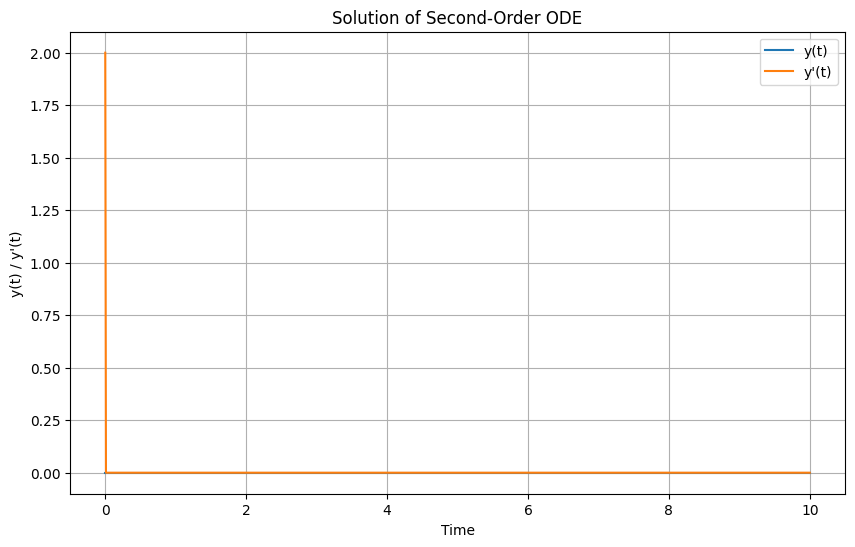

In [11]:
#B
import numpy as np
import matplotlib.pyplot as plt

# Parameters
m = 10
k = 90
c = 10
t_max = 10
h = 0.01  # Discretization parameter
initial_condition = [0, 2]  # Initial conditions: y(0) = 0, y'(0) = 2

# Function to solve the second-order ODE using central difference method
def solve_second_order_ODE(m, c, k, t_max, h, initial_condition):
    num_steps = int(t_max / h)
    t_values = np.linspace(0, t_max, num_steps + 1)
    y_values = np.zeros(num_steps + 1)
    y_prime_values = np.zeros(num_steps + 1)

    # Initial conditions
    y_values[0] = initial_condition[0]
    y_prime_values[0] = initial_condition[1]

    for i in range(1, num_steps + 1):
        y_values[i] = (2 * h**2 - 2 * (m - (h**2 * c / 2))) / (m + (h**2 * c / 2)) * y_values[i-1] \
                    - (h**2 * k) / (m + (h**2 * c / 2)) * y_values[i-2]
        y_prime_values[i] = (y_values[i] - y_values[i-1]) / h

    return t_values, y_values, y_prime_values

# Solve the ODE
t_values, y_values, y_prime_values = solve_second_order_ODE(m, c, k, t_max, h, initial_condition)

# Plot the solution
plt.figure(figsize=(10, 6))
plt.plot(t_values, y_values, label='y(t)')
plt.plot(t_values, y_prime_values, label="y'(t)")
plt.xlabel('Time')
plt.ylabel('y(t) / y\'(t)')
plt.title('Solution of Second-Order ODE')
plt.legend()
plt.grid(True)
plt.show()


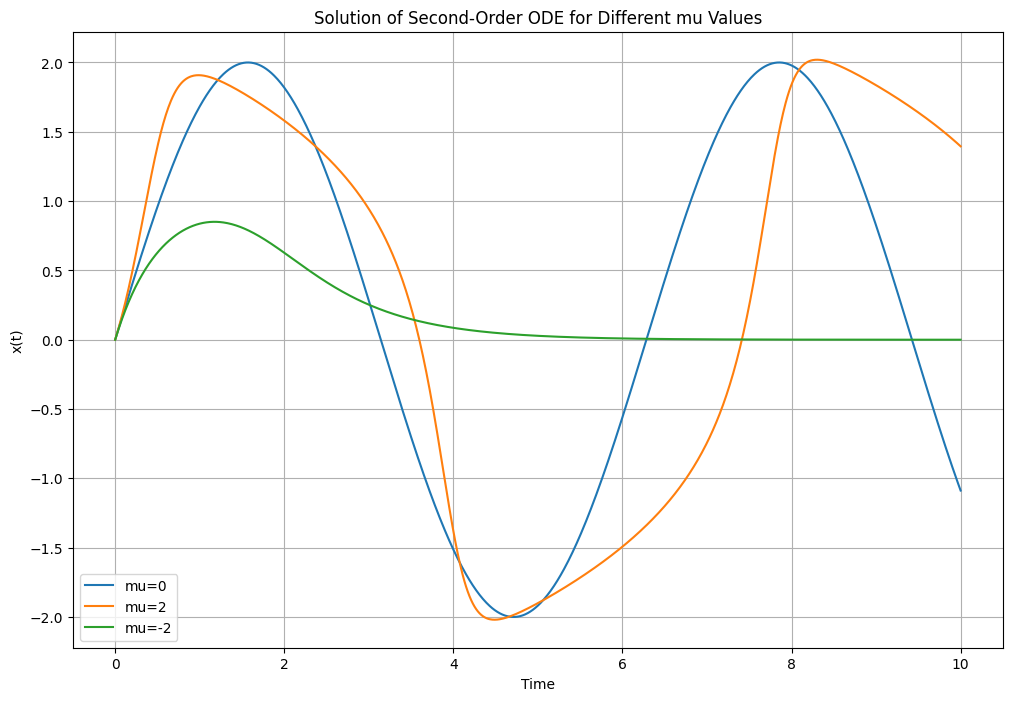

In [12]:
#C
import numpy as np
import matplotlib.pyplot as plt

# Function to solve the second-order ODE using central difference method
def solve_second_order_ODE(mu, t_max, h, initial_condition):
    def f(t, x, x_dot):
        return -x - mu * (x**2 - 1) * x_dot

    num_steps = int(t_max / h)
    t_values = np.linspace(0, t_max, num_steps + 1)
    x_values = np.zeros(num_steps + 1)
    x_dot_values = np.zeros(num_steps + 1)

    # Initial conditions
    x_values[0] = initial_condition[0]
    x_dot_values[0] = initial_condition[1]

    for i in range(1, num_steps + 1):
        k1_x = h * x_dot_values[i-1]
        k1_x_dot = h * f(t_values[i-1], x_values[i-1], x_dot_values[i-1])

        k2_x = h * (x_dot_values[i-1] + 0.5 * k1_x_dot)
        k2_x_dot = h * f(t_values[i-1] + 0.5 * h, x_values[i-1] + 0.5 * k1_x, x_dot_values[i-1] + 0.5 * k1_x_dot)

        k3_x = h * (x_dot_values[i-1] + 0.5 * k2_x_dot)
        k3_x_dot = h * f(t_values[i-1] + 0.5 * h, x_values[i-1] + 0.5 * k2_x, x_dot_values[i-1] + 0.5 * k2_x_dot)

        k4_x = h * (x_dot_values[i-1] + k3_x_dot)
        k4_x_dot = h * f(t_values[i-1] + h, x_values[i-1] + k3_x, x_dot_values[i-1] + k3_x_dot)

        x_values[i] = x_values[i-1] + (1/6) * (k1_x + 2 * k2_x + 2 * k3_x + k4_x)
        x_dot_values[i] = x_dot_values[i-1] + (1/6) * (k1_x_dot + 2 * k2_x_dot + 2 * k3_x_dot + k4_x_dot)

    return t_values, x_values, x_dot_values

# Parameters
mu_values = [0, 2, -2]
t_max = 10
h = 0.01  # Discretization parameter
initial_condition = [0, 2]  # Initial conditions: x(0) = 0, x'(0) = 2

# Plotting
plt.figure(figsize=(12, 8))

for mu in mu_values:
    t_values, x_values, x_dot_values = solve_second_order_ODE(mu, t_max, h, initial_condition)
    plt.plot(t_values, x_values, label=f'mu={mu}')

plt.xlabel('Time')
plt.ylabel('x(t)')
plt.title('Solution of Second-Order ODE for Different mu Values')
plt.legend()
plt.grid(True)
plt.show()



3. Solve the above equations using the in-built RK4 method. Discuss your observations.

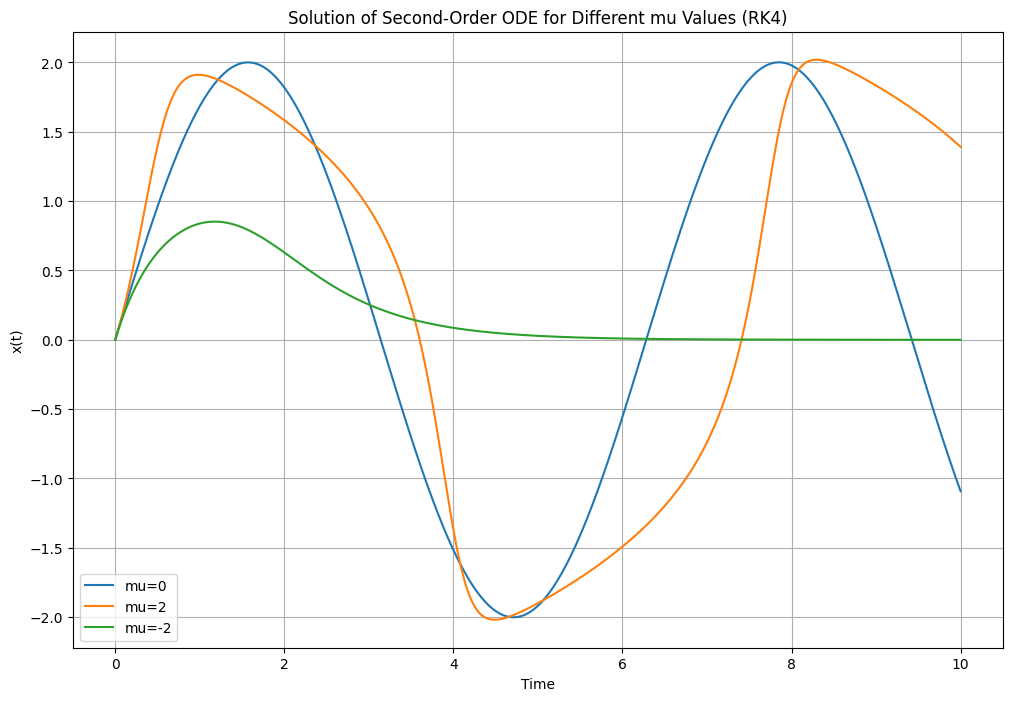

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the differential equation
def f(t, y, mu):
    x, x_dot = y
    return [x_dot, -x - mu * (x**2 - 1) * x_dot]

# Parameters
mu_values = [0, 2, -2]
t_span = (0, 10)
initial_condition = [0, 2]  # Initial conditions: x(0) = 0, x'(0) = 2

# Plotting
plt.figure(figsize=(12, 8))

for mu in mu_values:
    # Solve the IVP using RK4 method
    sol = solve_ivp(lambda t, y: f(t, y, mu), t_span, initial_condition, method='RK45', t_eval=np.linspace(*t_span, 1000))

    # Plot the solution
    plt.plot(sol.t, sol.y[0], label=f'mu={mu}')

plt.xlabel('Time')
plt.ylabel('x(t)')
plt.title('Solution of Second-Order ODE for Different mu Values (RK4)')
plt.legend()
plt.grid(True)
plt.show()



Observations:
- The RK4 method efficiently computes the solution of the differential equation for different values of \( \mu \).
- For \( \mu = 0 \), the solution exhibits simple harmonic motion without damping.
- For \( \mu = 2 \), the solution shows damped oscillations, indicating the damping effect introduced by the term \( \mu (x^2 - 1) \dot{x} \).
- For \( \mu = -2 \), the solution exhibits unstable behavior, with increasing amplitude over time. This instability arises due to the negative damping term, leading to unbounded growth.
- Overall, the RK4 method provides accurate and stable solutions for the given initial value problem, capturing the different behaviors dictated by the parameter \( \mu \).